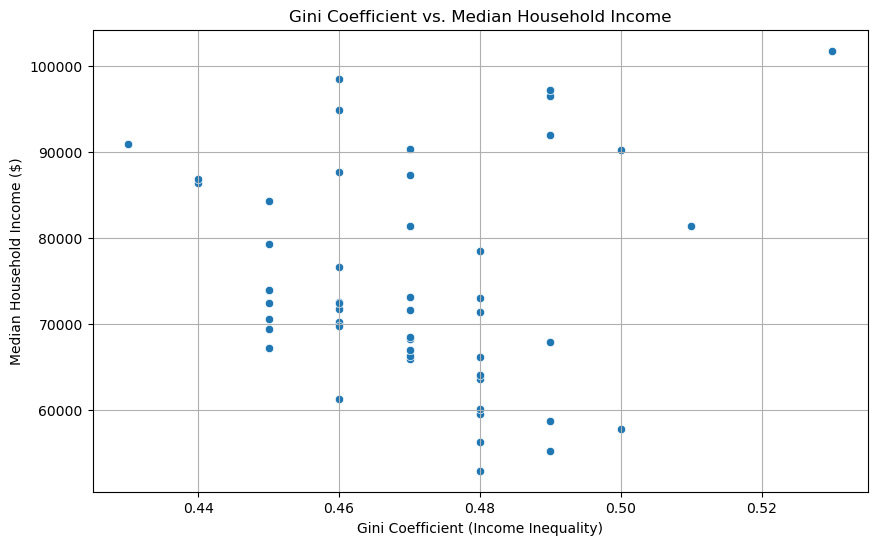

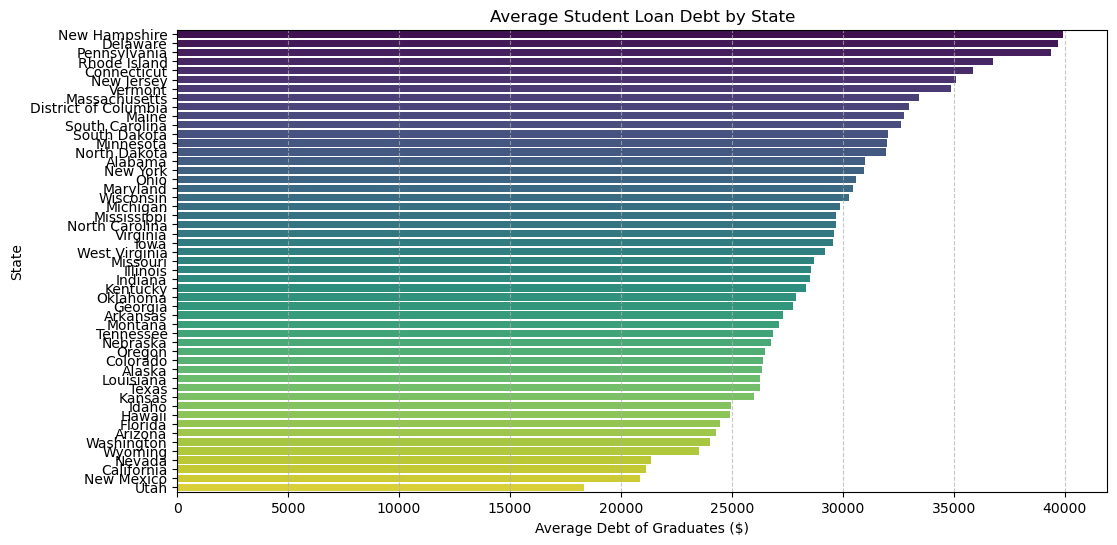

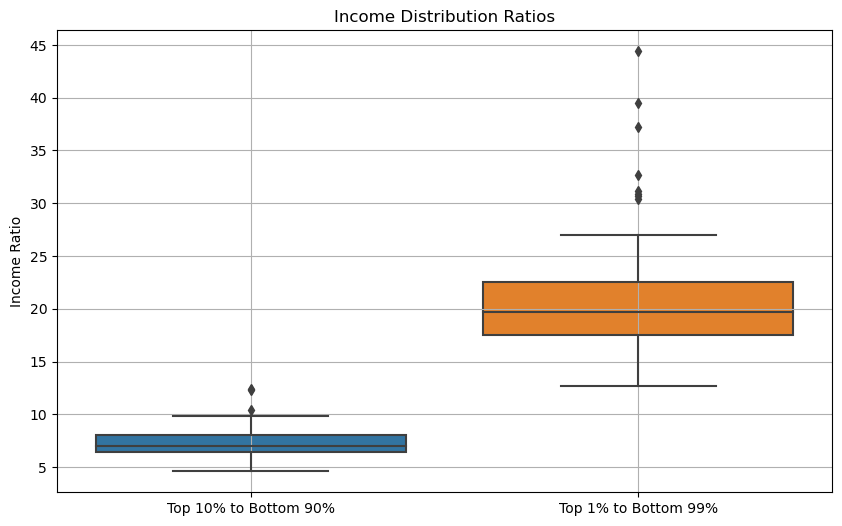

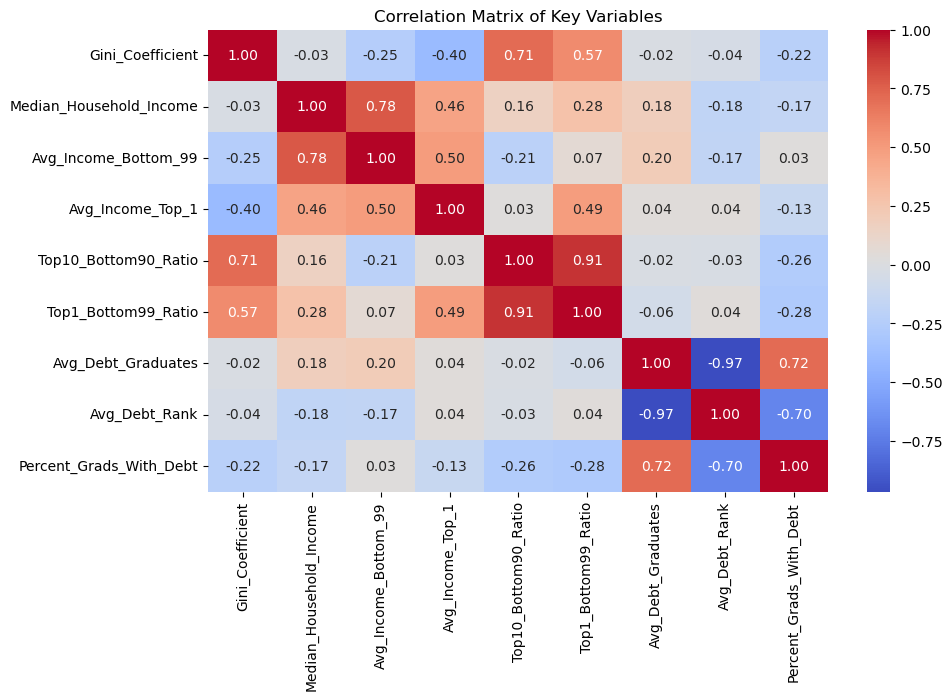

       Gini_Coefficient  Median_Household_Income  Avg_Income_Bottom_99  \
count         51.000000                51.000000             51.000000   
mean           0.470392             74805.039216          51041.098039   
std            0.018970             12431.790288           9362.261099   
min            0.430000             52985.000000          34987.000000   
25%            0.460000             66665.500000          43998.500000   
50%            0.470000             72458.000000          50953.000000   
75%            0.480000             85341.500000          57543.500000   
max            0.530000            101722.000000          71876.000000   

       Avg_Income_Top_1  Top10_Bottom90_Ratio  Top1_Bottom99_Ratio  \
count         29.000000             51.000000            51.000000   
mean      830711.827586              7.364902            21.441176   
std       118389.382690              1.610942             6.667299   
min       535648.000000              4.600000        

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = r"C:\Users\kaban\Downloads\ECON 322\Analysis Paper1 data.xlsx"  # Update with the correct file path if needed
xls = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name="Sheet1")

# Clean column names
df.columns = [
    "State", "Gini_Coefficient", "Median_Household_Income", "Avg_Income_Bottom_99",
    "Avg_Income_Top_1", "Top10_Bottom90_Ratio", "Top1_Bottom99_Ratio",
    "Avg_Debt_Graduates", "Avg_Debt_Rank", "Percent_Grads_With_Debt"
]

# Drop the first two rows as they contain headers and NaN values
df = df.iloc[2:].reset_index(drop=True)

# Convert numeric columns to appropriate types
numeric_cols = df.columns[1:]  # Excluding "State"
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

### SCATTER PLOT: Gini Coefficient vs. Median Household Income ###
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Gini_Coefficient", y="Median_Household_Income")
plt.title("Gini Coefficient vs. Median Household Income")
plt.xlabel("Gini Coefficient (Income Inequality)")
plt.ylabel("Median Household Income ($)")
plt.grid(True)
plt.show()

### BAR CHART: Average Student Loan Debt by State ###
df_sorted = df.sort_values(by="Avg_Debt_Graduates", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Avg_Debt_Graduates", y="State", palette="viridis")
plt.title("Average Student Loan Debt by State")
plt.xlabel("Average Debt of Graduates ($)")
plt.ylabel("State")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### BOX PLOT: Income Distribution Ratios ###
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Top10_Bottom90_Ratio", "Top1_Bottom99_Ratio"]])
plt.title("Income Distribution Ratios")
plt.ylabel("Income Ratio")
plt.xticks([0, 1], ["Top 10% to Bottom 90%", "Top 1% to Bottom 99%"])
plt.grid(True)
plt.show()

### CORRELATION MATRIX ###
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Variables")
plt.show()

### DESCRIPTIVE STATISTICS ###
desc_stats = df[numeric_cols].describe()
print(desc_stats)

# Save descriptive statistics as a CSV file for reference
desc_stats.to_csv("descriptive_statistics.csv")